In [1]:
import os
import numpy as np
import pandas as pd
from scipy.io import loadmat
from PIL import Image
from tqdm import tqdm
import torch

In [2]:
pd.set_option("display.max_colwidth", None)
dataset_csv = pd.read_csv("Deepsense_dataset.csv")

In [3]:
dataset_csv.head()

,index,unit1_rgb,unit1_pwr_60ghz,unit1_lidar,unit1_lidar_SCR,unit1_blockage,unit1_loc,unit2_loc,time_stamp[UTC],seq_index,blockage_label
0,1,../Carla/datasets/scenario25_dev/unit1/camera_data/image1_08_18_30.jpg,../Carla/datasets/scenario25_dev/unit1/mmWave_data/mmWave_power_1.txt,../Carla/datasets/scenario25_dev/unit1/LiDAR_data/lidar_data_1.mat,../Carla/datasets/scenario25_dev/unit1/LiDAR_SCR_data/lidar_SCR_data_1.mat,../Carla/datasets/scenario25_dev/unit1/label_data/label_1.txt,../Carla/datasets/scenario25_dev/unit1/GPS_data/gps_location.txt,../Carla/datasets/scenario25_dev/unit2/GPS_data/gps_location.txt,['08-18-30-0'],1,0
1,2,../Carla/datasets/scenario25_dev/unit1/camera_data/image2_08_18_31.jpg,../Carla/datasets/scenario25_dev/unit1/mmWave_data/mmWave_power_2.txt,../Carla/datasets/scenario25_dev/unit1/LiDAR_data/lidar_data_2.mat,../Carla/datasets/scenario25_dev/unit1/LiDAR_SCR_data/lidar_SCR_data_2.mat,../Carla/datasets/scenario25_dev/unit1/label_data/label_2.txt,../Carla/datasets/scenario25_dev/unit1/GPS_data/gps_location.txt,../Carla/datasets/scenario25_dev/unit2/GPS_data/gps_location.txt,['08-18-31-0'],1,0
2,3,../Carla/datasets/scenario25_dev/unit1/camera_data/image3_08_18_31.jpg,../Carla/datasets/scenario25_dev/unit1/mmWave_data/mmWave_power_3.txt,../Carla/datasets/scenario25_dev/unit1/LiDAR_data/lidar_data_3.mat,../Carla/datasets/scenario25_dev/unit1/LiDAR_SCR_data/lidar_SCR_data_3.mat,../Carla/datasets/scenario25_dev/unit1/label_data/label_3.txt,../Carla/datasets/scenario25_dev/unit1/GPS_data/gps_location.txt,../Carla/datasets/scenario25_dev/unit2/GPS_data/gps_location.txt,['08-18-31-142'],1,0
3,4,../Carla/datasets/scenario25_dev/unit1/camera_data/image4_08_18_31.jpg,../Carla/datasets/scenario25_dev/unit1/mmWave_data/mmWave_power_4.txt,../Carla/datasets/scenario25_dev/unit1/LiDAR_data/lidar_data_4.mat,../Carla/datasets/scenario25_dev/unit1/LiDAR_SCR_data/lidar_SCR_data_4.mat,../Carla/datasets/scenario25_dev/unit1/label_data/label_4.txt,../Carla/datasets/scenario25_dev/unit1/GPS_data/gps_location.txt,../Carla/datasets/scenario25_dev/unit2/GPS_data/gps_location.txt,['08-18-31-284'],1,0
4,5,../Carla/datasets/scenario25_dev/unit1/camera_data/image5_08_18_31.jpg,../Carla/datasets/scenario25_dev/unit1/mmWave_data/mmWave_power_5.txt,../Carla/datasets/scenario25_dev/unit1/LiDAR_data/lidar_data_5.mat,../Carla/datasets/scenario25_dev/unit1/LiDAR_SCR_data/lidar_SCR_data_5.mat,../Carla/datasets/scenario25_dev/unit1/label_data/label_5.txt,../Carla/datasets/scenario25_dev/unit1/GPS_data/gps_location.txt,../Carla/datasets/scenario25_dev/unit2/GPS_data/gps_location.txt,['08-18-31-426'],1,0


In [4]:
dataset_csv.query("blockage_label>=1").head()

,index,unit1_rgb,unit1_pwr_60ghz,unit1_lidar,unit1_lidar_SCR,unit1_blockage,unit1_loc,unit2_loc,time_stamp[UTC],seq_index,blockage_label
107,108,../Carla/datasets/scenario25_dev/unit1/camera_data/image108_08_18_42.jpg,../Carla/datasets/scenario25_dev/unit1/mmWave_data/mmWave_power_108.txt,../Carla/datasets/scenario25_dev/unit1/LiDAR_data/lidar_data_108.mat,../Carla/datasets/scenario25_dev/unit1/LiDAR_SCR_data/lidar_SCR_data_108.mat,../Carla/datasets/scenario25_dev/unit1/label_data/label_108.txt,../Carla/datasets/scenario25_dev/unit1/GPS_data/gps_location.txt,../Carla/datasets/scenario25_dev/unit2/GPS_data/gps_location.txt,['08-18-42-888'],1,1
108,109,../Carla/datasets/scenario25_dev/unit1/camera_data/image109_08_18_43.jpg,../Carla/datasets/scenario25_dev/unit1/mmWave_data/mmWave_power_109.txt,../Carla/datasets/scenario25_dev/unit1/LiDAR_data/lidar_data_109.mat,../Carla/datasets/scenario25_dev/unit1/LiDAR_SCR_data/lidar_SCR_data_109.mat,../Carla/datasets/scenario25_dev/unit1/label_data/label_109.txt,../Carla/datasets/scenario25_dev/unit1/GPS_data/gps_location.txt,../Carla/datasets/scenario25_dev/unit2/GPS_data/gps_location.txt,['08-18-43-0'],1,1
109,110,../Carla/datasets/scenario25_dev/unit1/camera_data/image110_08_18_43.jpg,../Carla/datasets/scenario25_dev/unit1/mmWave_data/mmWave_power_110.txt,../Carla/datasets/scenario25_dev/unit1/LiDAR_data/lidar_data_110.mat,../Carla/datasets/scenario25_dev/unit1/LiDAR_SCR_data/lidar_SCR_data_110.mat,../Carla/datasets/scenario25_dev/unit1/label_data/label_110.txt,../Carla/datasets/scenario25_dev/unit1/GPS_data/gps_location.txt,../Carla/datasets/scenario25_dev/unit2/GPS_data/gps_location.txt,['08-18-43-111'],1,1
110,111,../Carla/datasets/scenario25_dev/unit1/camera_data/image111_08_18_43.jpg,../Carla/datasets/scenario25_dev/unit1/mmWave_data/mmWave_power_111.txt,../Carla/datasets/scenario25_dev/unit1/LiDAR_data/lidar_data_111.mat,../Carla/datasets/scenario25_dev/unit1/LiDAR_SCR_data/lidar_SCR_data_111.mat,../Carla/datasets/scenario25_dev/unit1/label_data/label_111.txt,../Carla/datasets/scenario25_dev/unit1/GPS_data/gps_location.txt,../Carla/datasets/scenario25_dev/unit2/GPS_data/gps_location.txt,['08-18-43-222'],1,1
111,112,../Carla/datasets/scenario25_dev/unit1/camera_data/image112_08_18_43.jpg,../Carla/datasets/scenario25_dev/unit1/mmWave_data/mmWave_power_112.txt,../Carla/datasets/scenario25_dev/unit1/LiDAR_data/lidar_data_112.mat,../Carla/datasets/scenario25_dev/unit1/LiDAR_SCR_data/lidar_SCR_data_112.mat,../Carla/datasets/scenario25_dev/unit1/label_data/label_112.txt,../Carla/datasets/scenario25_dev/unit1/GPS_data/gps_location.txt,../Carla/datasets/scenario25_dev/unit2/GPS_data/gps_location.txt,['08-18-43-333'],1,1


In [5]:
dataset_csv

,index,unit1_rgb,unit1_pwr_60ghz,unit1_lidar,unit1_lidar_SCR,unit1_blockage,unit1_loc,unit2_loc,time_stamp[UTC],seq_index,blockage_label
0,1,../Carla/datasets/scenario25_dev/unit1/camera_data/image1_08_18_30.jpg,../Carla/datasets/scenario25_dev/unit1/mmWave_data/mmWave_power_1.txt,../Carla/datasets/scenario25_dev/unit1/LiDAR_data/lidar_data_1.mat,../Carla/datasets/scenario25_dev/unit1/LiDAR_SCR_data/lidar_SCR_data_1.mat,../Carla/datasets/scenario25_dev/unit1/label_data/label_1.txt,../Carla/datasets/scenario25_dev/unit1/GPS_data/gps_location.txt,../Carla/datasets/scenario25_dev/unit2/GPS_data/gps_location.txt,['08-18-30-0'],1,0
1,2,../Carla/datasets/scenario25_dev/unit1/camera_data/image2_08_18_31.jpg,../Carla/datasets/scenario25_dev/unit1/mmWave_data/mmWave_power_2.txt,../Carla/datasets/scenario25_dev/unit1/LiDAR_data/lidar_data_2.mat,../Carla/datasets/scenario25_dev/unit1/LiDAR_SCR_data/lidar_SCR_data_2.mat,../Carla/datasets/scenario25_dev/unit1/label_data/label_2.txt,../Carla/datasets/scenario25_dev/unit1/GPS_data/gps_location.txt,../Carla/datasets/scenario25_dev/unit2/GPS_data/gps_location.txt,['08-18-31-0'],1,0
2,3,../Carla/datasets/scenario25_dev/unit1/camera_data/image3_08_18_31.jpg,../Carla/datasets/scenario25_dev/unit1/mmWave_data/mmWave_power_3.txt,../Carla/datasets/scenario25_dev/unit1/LiDAR_data/lidar_data_3.mat,../Carla/datasets/scenario25_dev/unit1/LiDAR_SCR_data/lidar_SCR_data_3.mat,../Carla/datasets/scenario25_dev/unit1/label_data/label_3.txt,../Carla/datasets/scenario25_dev/unit1/GPS_data/gps_location.txt,../Carla/datasets/scenario25_dev/unit2/GPS_data/gps_location.txt,['08-18-31-142'],1,0
3,4,../Carla/datasets/scenario25_dev/unit1/camera_data/image4_08_18_31.jpg,../Carla/datasets/scenario25_dev/unit1/mmWave_data/mmWave_power_4.txt,../Carla/datasets/scenario25_dev/unit1/LiDAR_data/lidar_data_4.mat,../Carla/datasets/scenario25_dev/unit1/LiDAR_SCR_data/lidar_SCR_data_4.mat,../Carla/datasets/scenario25_dev/unit1/label_data/label_4.txt,../Carla/datasets/scenario25_dev/unit1/GPS_data/gps_location.txt,../Carla/datasets/scenario25_dev/unit2/GPS_data/gps_location.txt,['08-18-31-284'],1,0
4,5,../Carla/datasets/scenario25_dev/unit1/camera_data/image5_08_18_31.jpg,../Carla/datasets/scenario25_dev/unit1/mmWave_data/mmWave_power_5.txt,../Carla/datasets/scenario25_dev/unit1/LiDAR_data/lidar_data_5.mat,../Carla/datasets/scenario25_dev/unit1/LiDAR_SCR_data/lidar_SCR_data_5.mat,../Carla/datasets/scenario25_dev/unit1/label_data/label_5.txt,../Carla/datasets/scenario25_dev/unit1/GPS_data/gps_location.txt,../Carla/datasets/scenario25_dev/unit2/GPS_data/gps_location.txt,['08-18-31-426'],1,0
...,...,...,...,...,...,...,...,...,...,...,...
78544,78545,../Carla/datasets/scenario25_dev/unit1/camera_data/image79996_10_52_22.jpg,../Carla/datasets/scenario25_dev/unit1/mmWave_data/mmWave_power_79996.txt,../Carla/datasets/scenario25_dev/unit1/LiDAR_data/lidar_data_79996.mat,../Carla/datasets/scenario25_dev/unit1/LiDAR_SCR_data/lidar_SCR_data_79996.mat,../Carla/datasets/scenario25_dev/unit1/label_data/label_79996.txt,../Carla/datasets/scenario25_dev/unit1/GPS_data/gps_location.txt,../Carla/datasets/scenario25_dev/unit2/GPS_data/gps_location.txt,['10-52-22-166'],1,0
78545,78546,../Carla/datasets/scenario25_dev/unit1/camera_data/image79997_10_52_22.jpg,../Carla/datasets/scenario25_dev/unit1/mmWave_data/mmWave_power_79997.txt,../Carla/datasets/scenario25_dev/unit1/LiDAR_data/lidar_data_79997.mat,../Carla/datasets/scenario25_dev/unit1/LiDAR_SCR_data/lidar_SCR_data_79997.mat,../Carla/datasets/scenario25_dev/unit1/label_data/label_79997.txt,../Carla/datasets/scenario25_dev/unit1/GPS_data/gps_location.txt,../Carla/datasets/scenario25_dev/unit2/GPS_data/gps_location.txt,['10-52-22-332'],1,0
78546,78547,../Carla/datasets/scenario25_dev/unit1/camera_data/image79998_10_52_22.jpg,../Carla/datasets/scenario25_dev/unit1/mmWave_data/mmWave_power_79998.txt,../Carla/datasets/scenario25_dev/unit1/LiDAR_data/lidar_data_79998.mat,../Carla/datasets/scenario25_de

In [30]:
from torch.utils.data import Dataset
resize = transforms.Resize((224, 224))  # Resize to target dimensions


class FutureClearWindowDataset(Dataset):
    def __init__(self, csv_path, root_dir='.', window_length=16, T_f=5, transform=None):
        self.df = pd.read_csv(csv_path)
        self.root_dir = root_dir
        self.window_length = window_length
        self.T_f = T_f
        self.transform = transform

        # Total number of valid sliding windows
        self.valid_indices = [
            i for i in range(len(self.df) - window_length - T_f)
        ]

    def __len__(self):
        return len(self.valid_indices)

    def __getitem__(self, idx):
        start_idx = self.valid_indices[idx]
        end_idx = start_idx + self.window_length
        future_start = end_idx
        future_end = future_start + self.T_f

        window_df = self.df.iloc[start_idx:end_idx]
        future_df = self.df.iloc[future_start:future_end]

        # Load data for window
        lidar_frames = []
        power_frames = []
        rgb_frames = []

        for row in window_df.itertuples():
            lidar = loadmat(os.path.join(self.root_dir, row.unit1_lidar_SCR))['data']
            power = np.loadtxt(os.path.join(self.root_dir, row.unit1_pwr_60ghz))
            rgb = Image.open(os.path.join(self.root_dir, row.unit1_rgb)).convert('L')
            rgb = resize(rgb)
            lidar_frames.append(lidar)
            power_frames.append(power)
            rgb_frames.append(rgb)
        lidar = torch.tensor(np.stack(lidar_frames), dtype=torch.float32).permute(2, 0, 1)
        lidar[0, :, :] = lidar[0, :, :] / 16.392
        lidar[1, :, :] = (lidar[1] - (-2.0941)) / (1.5621 - (-2.0941))
        power = torch.tensor(np.stack(power_frames), dtype=torch.float32)
        rgb = torch.tensor(np.stack(rgb_frames), dtype=torch.float32)

        # Future label logic: label = 1 if no blockage in future window
        future_blockages = future_df['blockage_label'].astype(float).values
        label = 1 - int(np.all(future_blockages == 0))  # 1 = clear, 0 = blockage ahead

        label = torch.tensor(label, dtype=torch.long)

        if self.transform:
            lidar, power, rgb = self.transform(lidar, power, rgb)

        return {
            'lidar': lidar,      # shape (window_length, ...)
            'power': power,
            'rgb': rgb,
            'label': label
        }

In [31]:
import os
os.cpu_count()

12

torch.Size([32, 2, 16, 216]) torch.Size([32, 16, 64]) torch.Size([32, 16, 224, 224]) tensor([1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
        1, 0, 0, 1, 0, 0, 0, 1])
tensor(1)


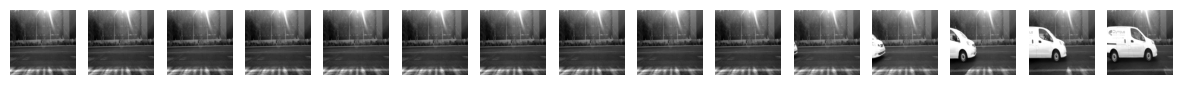

In [41]:
from torch.utils.data import Dataset, DataLoader, WeightedRandomSampler
import matplotlib.pyplot as plt
dataset = FutureClearWindowDataset(
    csv_path='Deepsense_dataset.csv',
    window_length=16,
    T_f=5
)

# Load from file
sample_weights_loaded = torch.load('sample_weights.pt', weights_only=True)


# Create sampler
sampler = WeightedRandomSampler(sample_weights_loaded, num_samples=len(sample_weights_loaded), replacement=True)

# Create DataLoader
loader = DataLoader(dataset, batch_size=32, sampler=sampler)


for batch in loader:
    print(batch['lidar'].shape, batch['power'].shape, batch['rgb'].shape, batch['label'])
    #print(torch.max(batch['lidar'][:, 0, :, :]), torch.max(batch['lidar'][:, 1, :, :]), torch.min(batch['lidar'][:, 1, :, :]))
    rgb_frames = batch['rgb']  # shape: (batch_size, num_frames, channels, height, width)

    # Let's plot the first image from the first batch (index 0)
    # We'll visualize a few frames from the first example in the batch

    num_frames_to_plot = 15  # Number of frames to visualize
    fig, axes = plt.subplots(1, num_frames_to_plot, figsize=(15, 5))
    print(batch["label"][0])
    for i in range(num_frames_to_plot):
        frame = rgb_frames[0, i, :, :]  # Get the first frame, with shape (height, width)
        frame = frame.numpy()  # Convert tensor to numpy array for plotting
        axes[i].imshow(frame, cmap='gray')  # Display the image in grayscale
        axes[i].axis('off')  # Turn off axis labels
    
    plt.show()
    break
# 16.392  1.5621  -2.0941

In [9]:
'''
from collections import Counter

# First, count labels in the whole dataset
label_counter = Counter()

for item in dataset:
    label = item['label'].item()  # assuming 'label' is a scalar tensor
    label_counter[label] += 1

print(label_counter)

# Compute weights
total = sum(label_counter.values())
class_weights = {cls: total/count for cls, count in label_counter.items()}
print(class_weights)

Counter({0: 71828, 1: 6695})
{0: 1.0932087765216907, 1: 11.728603435399553}'''

"\nfrom collections import Counter\n\n# First, count labels in the whole dataset\nlabel_counter = Counter()\n\nfor item in dataset:\n    label = item['label'].item()  # assuming 'label' is a scalar tensor\n    label_counter[label] += 1\n\nprint(label_counter)\n\n# Compute weights\ntotal = sum(label_counter.values())\nclass_weights = {cls: total/count for cls, count in label_counter.items()}\nprint(class_weights)\n\nCounter({0: 71828, 1: 6695})\n{0: 1.0932087765216907, 1: 11.728603435399553}"

In [10]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class LiDARSCRNet(nn.Module):
    def __init__(self, input_channels=2, num_classes=2, dropout_rate=0.2):
        super(LiDARSCRNet, self).__init__()

        # Stack 1
        self.conv1 = nn.Conv2d(input_channels, 4, kernel_size=(1, 5), padding=0)
        self.pool1 = nn.MaxPool2d(kernel_size=(1, 2))

        # Stack 2
        self.conv2 = nn.Conv2d(4, 4, kernel_size=(1, 5), padding=0)
        self.pool2 = nn.MaxPool2d(kernel_size=(1, 2))

        # Stack 3
        self.conv3 = nn.Conv2d(4, 8, kernel_size=(1, 5), padding=0)
        self.pool3 = nn.MaxPool2d(kernel_size=(1, 2))

        # Fusion Stack
        self.fusion_conv1 = nn.Conv2d(8, 16, kernel_size=3, padding=1)
        self.fusion_pool1 = nn.MaxPool2d(kernel_size=(2, 3))

        self.fusion_conv2 = nn.Conv2d(16, 16, kernel_size=3, padding=1)
        self.fusion_pool2 = nn.MaxPool2d(kernel_size=(2, 2))

        # Final classifier
        self.dropout = nn.Dropout(dropout_rate)
        self.fc = nn.Linear(192, num_classes)

    def forward(self, x):
        # x: (B, 2, 460, 16) or (B, 2, 216, 16) after permuting dims from (B, 16, 460, 2)
        x = F.relu(self.conv1(x))
        x = self.pool1(x)

        x = F.relu(self.conv2(x))
        x = self.pool2(x)

        x = F.relu(self.conv3(x))
        x = self.pool3(x)

        x = F.relu(self.fusion_conv1(x))
        x = self.fusion_pool1(x)

        x = F.relu(self.fusion_conv2(x))
        x = self.fusion_pool2(x)

        x = torch.flatten(x, 1)  # flatten except batch
        x = self.dropout(x)
        x = self.fc(x)
        return x

In [11]:
class mmWaveSCRNet(nn.Module):
    def __init__(self, input_channels=1, num_classes=2, dropout_rate=0.2):
        super(mmWaveSCRNet, self).__init__()

        # Stack 1
        self.conv1 = nn.Conv2d(input_channels, 4, kernel_size=(1, 3), padding=(0, 1))
        
        # Stack 2
        self.conv2 = nn.Conv2d(4, 8, kernel_size=(1, 3), padding=(0, 1))

        # Fusion Stack
        self.fusion_conv1 = nn.Conv2d(8, 16, kernel_size=3, padding=1)
        self.fusion_pool1 = nn.MaxPool2d(kernel_size=(2, 3))

        self.fusion_conv2 = nn.Conv2d(16, 16, kernel_size=3, padding=1)
        self.fusion_pool2 = nn.MaxPool2d(kernel_size=(2, 2))

        # Fully connected output layer
        self.dropout = nn.Dropout(dropout_rate)
        self.fc = nn.Linear(576, num_classes)

    def forward(self, x):
        # x: (B, 1, 1, 54)
        x = F.relu(self.conv1(x))  # -> (B, 4, 1, 54)
        x = F.relu(self.conv2(x))  # -> (B, 8, 1, 54)

        x = F.relu(self.fusion_conv1(x))  # -> (B, 16, 1, 54)
        x = self.fusion_pool1(x)          # -> (B, 16, ?, ?)

        x = F.relu(self.fusion_conv2(x))  # -> (B, 16, ?, ?)
        x = self.fusion_pool2(x)          # -> (B, 16, ?, ?)

        x = torch.flatten(x, 1)
        x = self.dropout(x)
        x = self.fc(x)
        return x

In [63]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class BlockagePredictionCNN(nn.Module):
    def __init__(self, num_classes=2, dropout_rate=0.01):
        super(BlockagePredictionCNN, self).__init__()

        # 3D convolution to process both temporal and spatial data
        self.conv1 = nn.Conv3d(16, 16, kernel_size=(3, 7, 7), padding=(1, 3, 3))
        self.pool1 = nn.MaxPool3d(kernel_size=(1, 2, 2))

        self.conv2 = nn.Conv3d(16, 32, kernel_size=(3, 5, 5), padding=(1, 2, 2))
        self.pool2 = nn.MaxPool3d(kernel_size=(1, 2, 2))

        self.conv3 = nn.Conv3d(32, 64, kernel_size=(3, 3, 3), padding=(1, 1, 1))
        self.pool3 = nn.MaxPool3d(kernel_size=(1, 2, 2))

        # Fusion stack
        self.fusion_conv1 = nn.Conv3d(64, 128, kernel_size=3, padding=1)
        self.fusion_pool1 = nn.MaxPool3d(kernel_size=(1, 2, 2))

        # Dropout and fully connected layers
        self.dropout = nn.Dropout(dropout_rate)
        self.fc = nn.Linear(128 * 4 * 7 * 7, num_classes)  # Adjusted based on the output size

    def forward(self, x):
        # x: (B, 16, 224, 224)

        # Add a dummy channel dimension for Conv3D (treat frames as depth)
        x = x.unsqueeze(2)  # (B, 16, 1, 224, 224)

        # Apply 3D convolutions and pooling
        x = F.relu(self.conv1(x))
        x = self.pool1(x)

        x = F.relu(self.conv2(x))
        x = self.pool2(x)

        x = F.relu(self.conv3(x))
        x = self.pool3(x)

        # Fusion layer
        x = F.relu(self.fusion_conv1(x))
        x = self.fusion_pool1(x)

        # Flatten and apply dropout
        x = torch.flatten(x, 1)  # Flatten except batch dimension
        #x = self.dropout(x)

        # Final classification layer
        print(x.shape)
        x = self.fc(x)
        return x


In [56]:
from torchsummary import summary

In [13]:
model_lidar = LiDARSCRNet()
model_RF = mmWaveSCRNet()

In [14]:
for batch in loader:
    print(batch['lidar'].shape, batch['power'].shape, batch['rgb'].shape, batch['label'])
    y_hat = model_lidar(batch['lidar'])
    print(y_hat)
    break

torch.Size([32, 2, 16, 216]) torch.Size([32, 16, 64]) torch.Size([32, 16, 540, 960]) tensor([0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1,
        0, 1, 1, 0, 0, 0, 1, 1])
tensor([[ 0.0865, -0.0570],
        [ 0.0818, -0.0334],
        [ 0.0858, -0.0529],
        [ 0.0772, -0.0520],
        [ 0.0658, -0.0672],
        [ 0.0711, -0.0810],
        [ 0.0831, -0.0637],
        [ 0.0804, -0.0654],
        [ 0.0877, -0.0630],
        [ 0.0989, -0.0517],
        [ 0.0757, -0.0452],
        [ 0.0721, -0.0489],
        [ 0.0587, -0.0764],
        [ 0.0758, -0.0576],
        [ 0.0842, -0.0764],
        [ 0.0923, -0.0535],
        [ 0.0862, -0.0522],
        [ 0.0829, -0.0620],
        [ 0.0678, -0.0592],
        [ 0.0801, -0.0906],
        [ 0.0784, -0.0718],
        [ 0.0880, -0.0534],
        [ 0.0845, -0.0622],
        [ 0.0915, -0.0711],
        [ 0.0805, -0.0575],
        [ 0.0811, -0.0633],
        [ 0.1022, -0.0404],
        [ 0.0662, -0.0530],
        [ 0.0837, 

In [15]:
import torch.optim as optim

model_lidar = model_lidar.to(device := torch.device("cuda" if torch.cuda.is_available() else "cpu"))

# Loss and optimizer
# Make a list of weights sorted by class index
class_weights = {0: 1.0932087765216907, 1: 6.728603435399553}
weights_tensor = torch.tensor([class_weights[i] for i in range(len(class_weights))], dtype=torch.float).to(device)

criterion = nn.CrossEntropyLoss(weight=weights_tensor)  # if you use classification

#criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_lidar.parameters(), lr=1e-4)

# Single epoch (no loop)
model_lidar.train()

running_loss = 0.0
total = 0
correct = 0
for epoch in range(10):
    for inputs, i in zip(loader, range(10)):
        print(i)
        labels = inputs["label"].to(device)
        inputs = inputs["lidar"].to(device)  # Should be (B, 2, H, W)
    
        optimizer.zero_grad()
        outputs = model_lidar(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
    
        running_loss += loss.item() * inputs.size(0)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        print(predicted, labels)
    
    epoch_loss = running_loss / total
    epoch_acc = 100. * correct / total
    print(f"Loss: {epoch_loss:.4f}, Accuracy: {epoch_acc:.2f}%")

0
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0], device='cuda:0') tensor([1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 1, 1, 0, 0, 0], device='cuda:0')
1
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0], device='cuda:0') tensor([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
        0, 0, 1, 0, 0, 0, 0, 0], device='cuda:0')
2
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0], device='cuda:0') tensor([0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
        1, 1, 0, 0, 0, 1, 0, 0], device='cuda:0')
3
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0], device='cuda:0') tensor([0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
  

KeyboardInterrupt: 

In [64]:
# Assuming model is already defined as LiDARSCRNet and you've already set up the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Example: Instantiate your model
model_rgb = BlockagePredictionCNN(num_classes=2, dropout_rate=0.2)  # Assuming RGB input (3 channels)

# Move model to the appropriate device
model_rgb = model_rgb.to(device)

# Loss and optimizer
class_weights = {0: 1.0, 1: 1.0}  # Example class weights, adjust these based on your dataset
weights_tensor = torch.tensor([class_weights[i] for i in range(len(class_weights))], dtype=torch.float).to(device)

criterion = nn.CrossEntropyLoss(weight=weights_tensor)  # Loss function with class weights
optimizer = optim.Adam(model_rgb.parameters(), lr=1e-3)  # Optimizer


# Training loop
num_epochs = 10
for epoch in range(num_epochs):
    model_rgb.train()  # Set model to training mode
    
    running_loss = 0.0
    total = 0
    correct = 0
    
    for batch_idx, batch in zip(range(10), loader):
        rgb = batch['rgb'].to(device)  # Get RGB frames (input)
        labels = batch['label'].to(device)  # Get labels (output)
        
        # Zero the parameter gradients
        optimizer.zero_grad()
        print(rgb.shape)
        # Forward pass
        outputs = model_rgb(rgb)  # Pass input through the model
        
        # Compute loss
        loss = criterion(outputs, labels)
        
        # Backward pass and optimization
        loss.backward()
        optimizer.step()
        
        # Track loss and accuracy
        running_loss += loss.item() * rgb.size(0)  # Accumulate loss for the batch
        _, predicted = torch.max(outputs.data, 1)  # Get predicted class
        total += labels.size(0)
        correct += (predicted == labels).sum().item()  # Count correct predictions
        
        if batch_idx % 10 == 0:  # Print every 10 batches for monitoring
            print(f"Batch {batch_idx}/{len(loader)} - Loss: {loss.item():.4f}")

        print(predicted, labels)
    
    # Epoch loss and accuracy
    epoch_loss = running_loss / total
    epoch_acc = 100. * correct / total
    print(f"Epoch {epoch+1}/{num_epochs} - Loss: {epoch_loss:.4f}, Accuracy: {epoch_acc:.2f}%")

torch.Size([32, 16, 224, 224])
torch.Size([32, 25088])
Batch 0/2454 - Loss: 0.6747
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0], device='cuda:0') tensor([1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
        1, 0, 0, 1, 1, 0, 0, 0], device='cuda:0')
torch.Size([32, 16, 224, 224])
torch.Size([32, 25088])
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0], device='cuda:0') tensor([0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
        1, 1, 1, 1, 0, 0, 1, 0], device='cuda:0')
torch.Size([32, 16, 224, 224])
torch.Size([32, 25088])
tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1], device='cuda:0') tensor([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
        0, 0, 1, 0, 1, 1, 0, 1], device='cuda:0')
torch.Size([32, 16, 224, 22